In [1]:
%matplotlib widget
import pandas as pd

import json
from pathlib import Path
import os

import matplotlib.pyplot as plt
import itertools

def map_trans_to_string(i:int):
    match i:
        case 111:
            string="no transpose"
        case 112:
            string="transpose"
    return string

def map_order_to_string(i:int):
    match i:
        case 101:
            string="row major"
        case 102:
            string="col major"
    return string

## General analysis of methods

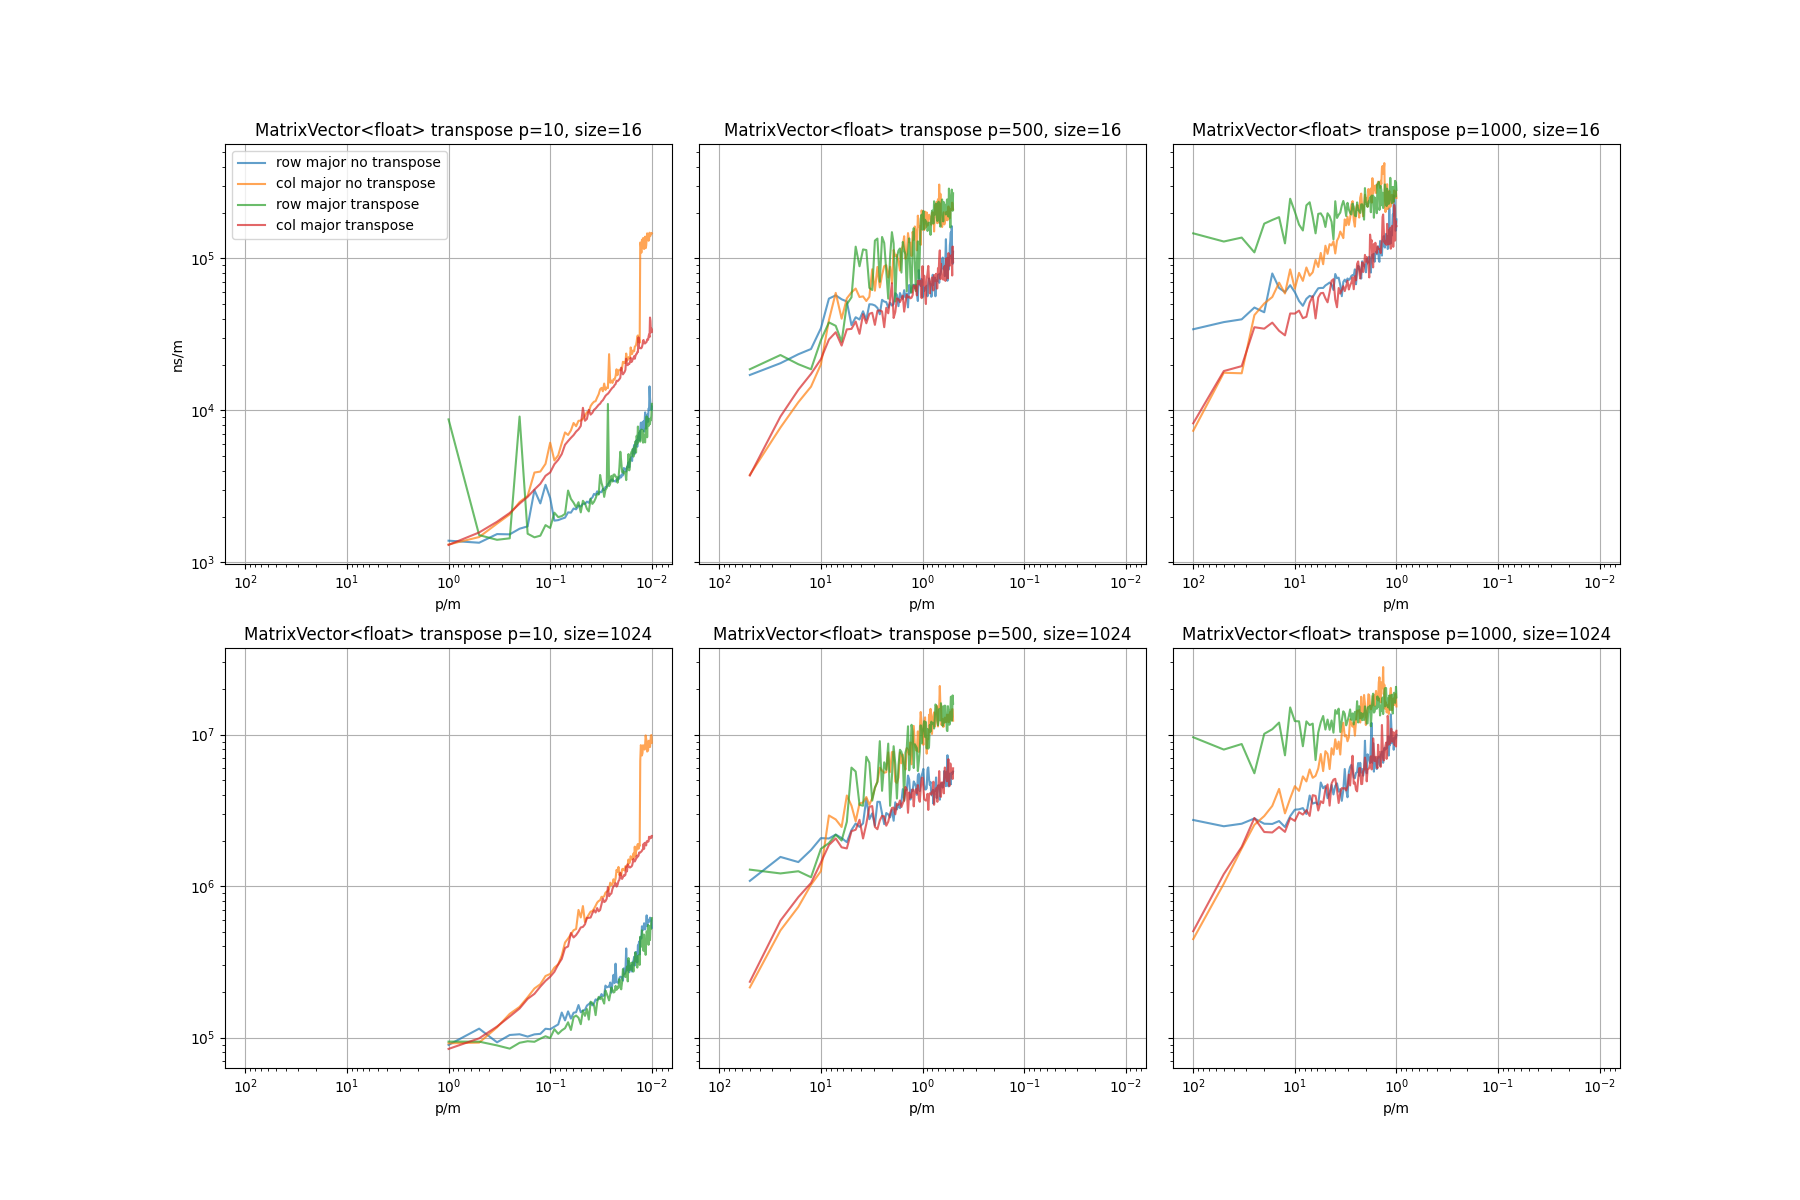

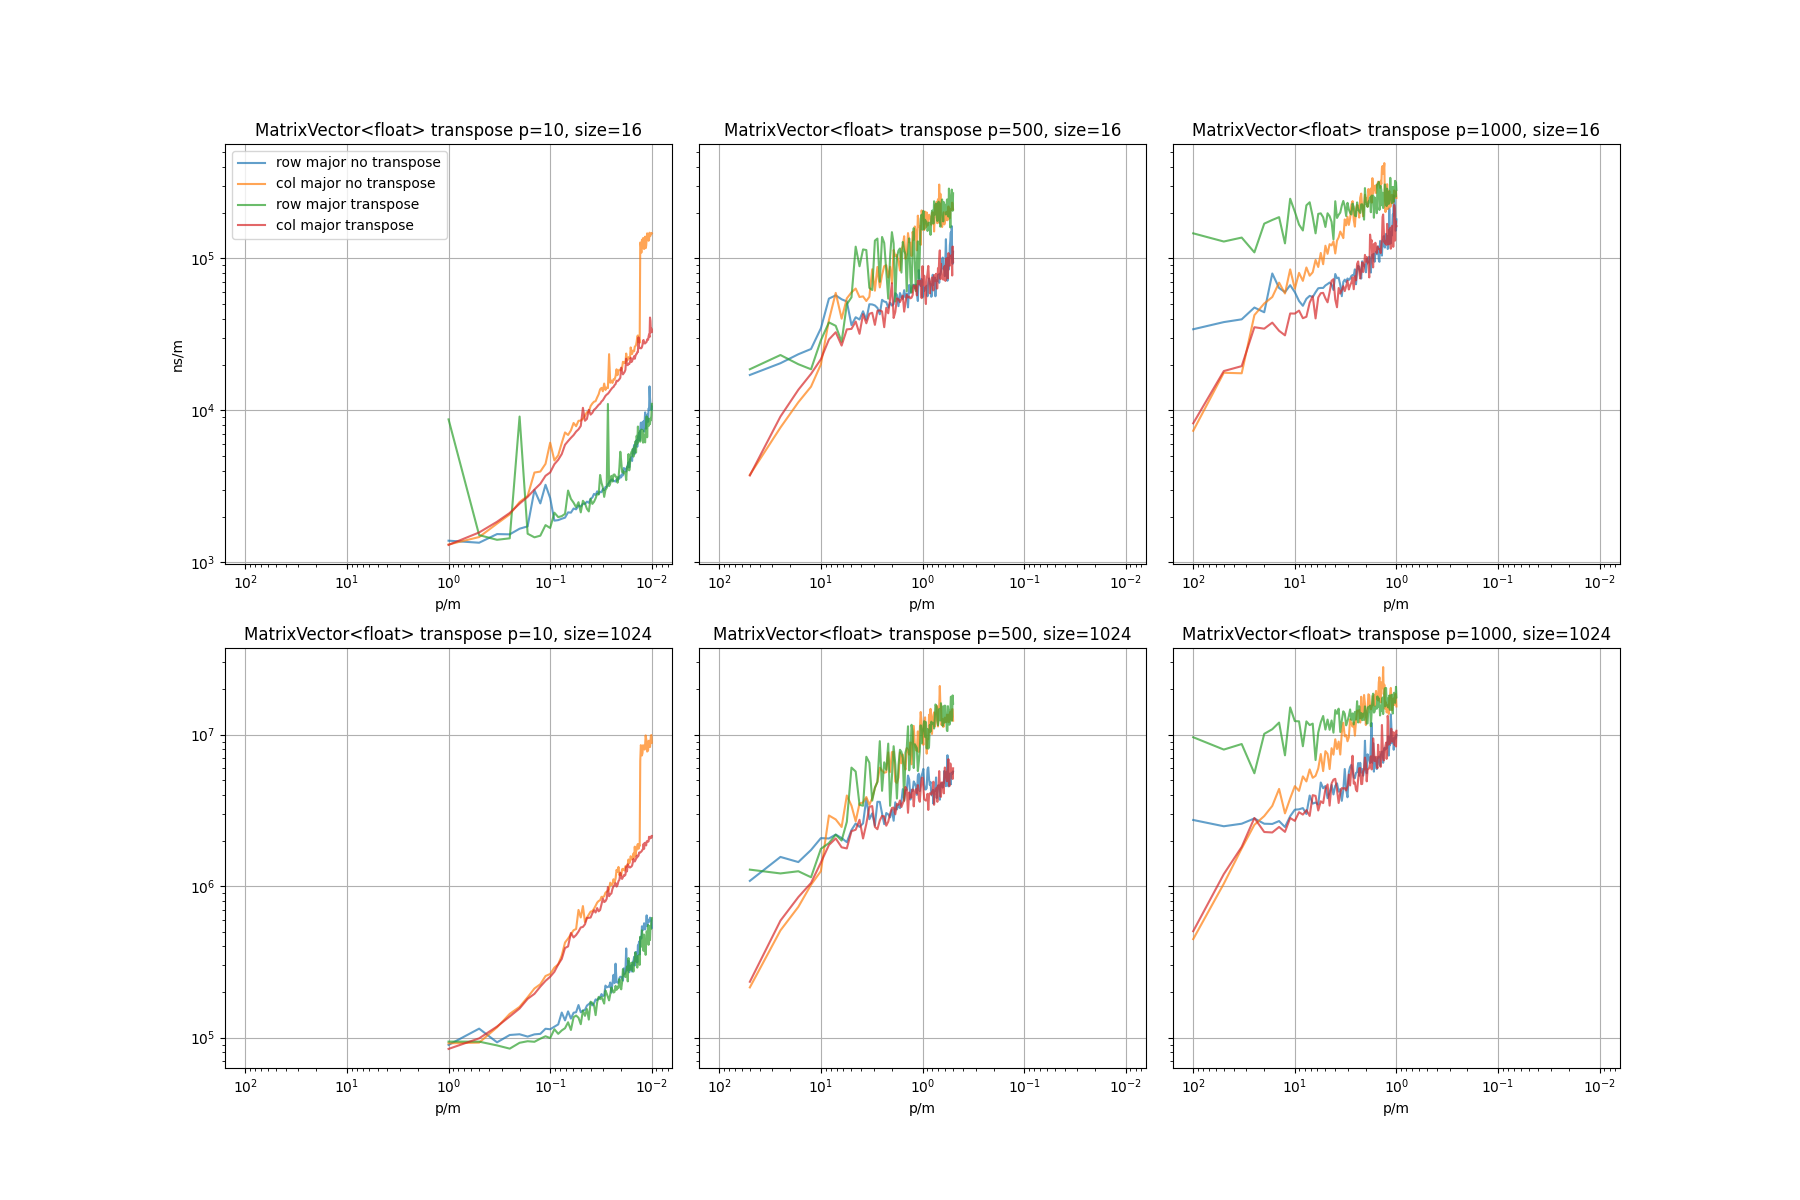

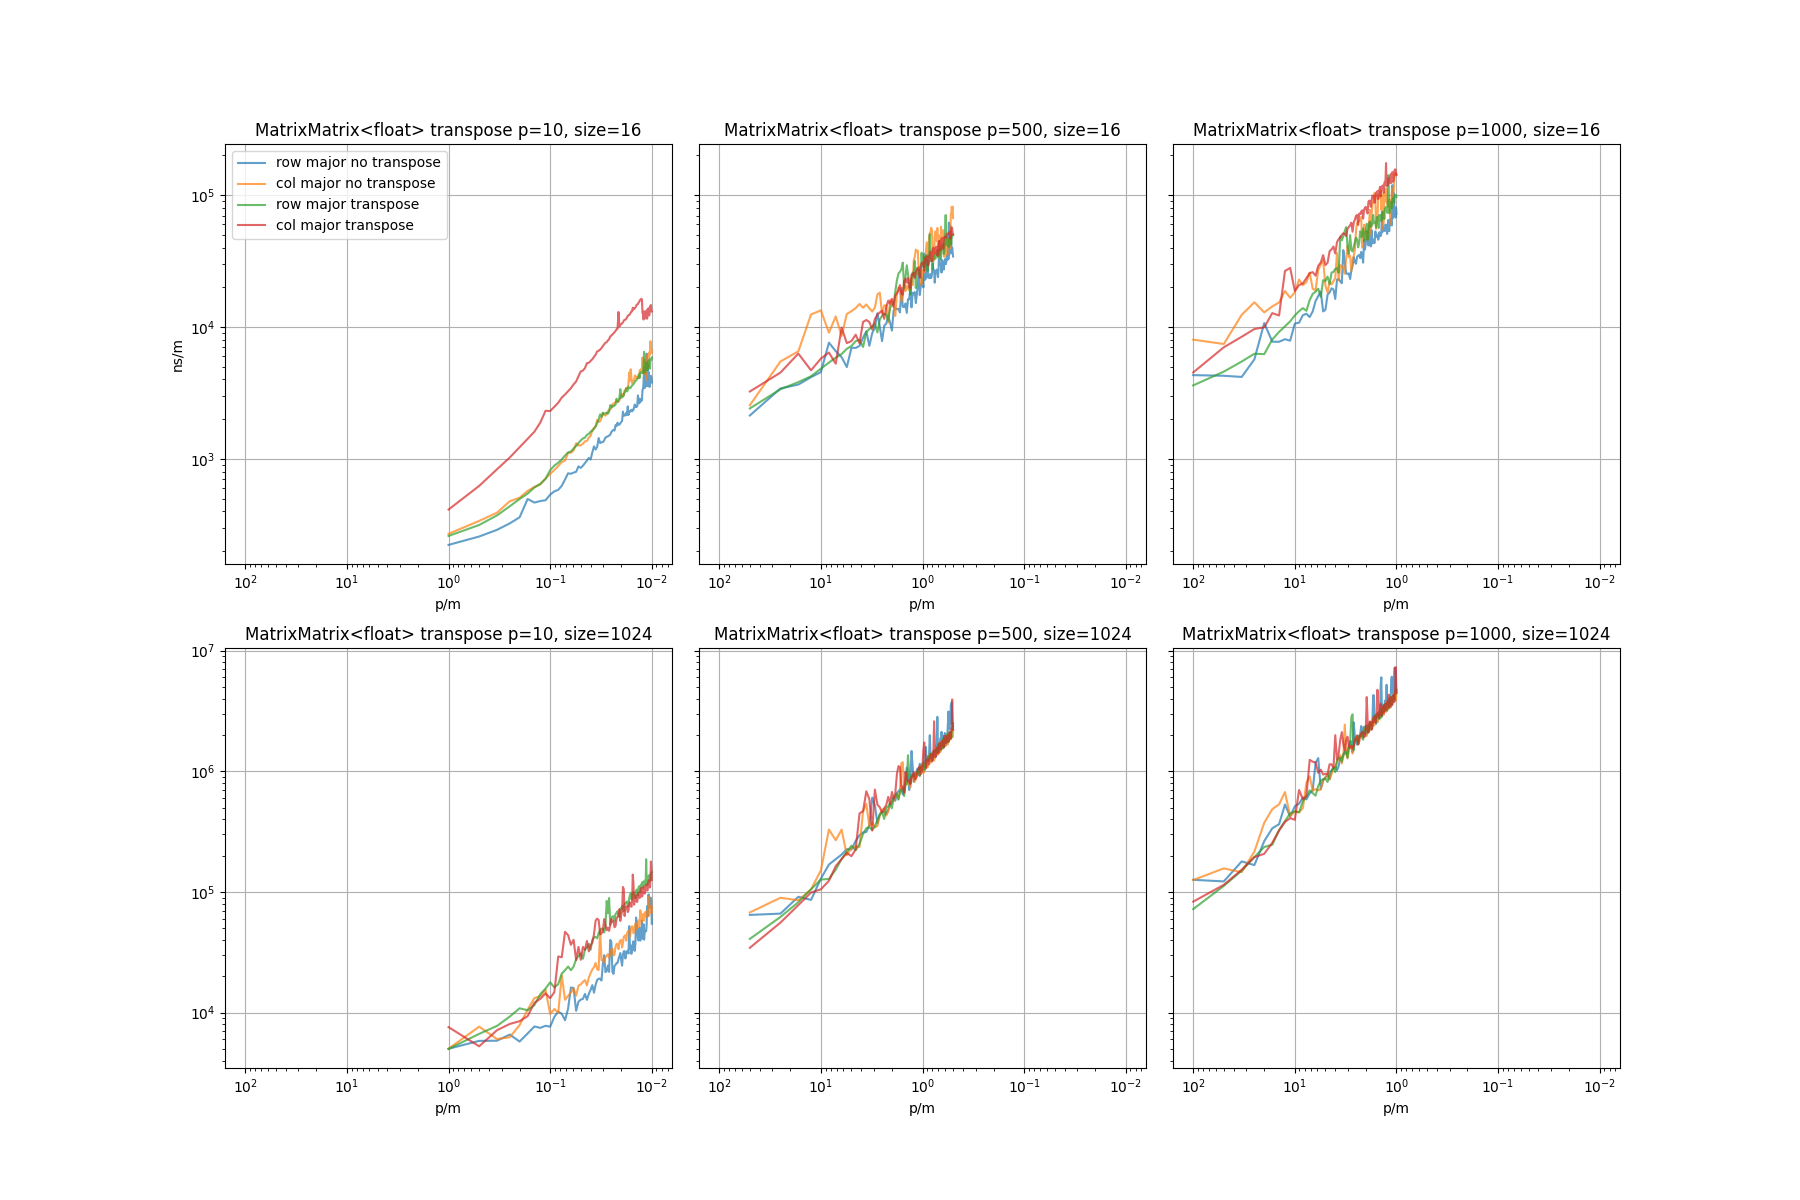

In [2]:
blas_benchfile = Path(os.path.abspath(''))/ "build/blas_benchmark_bu.json"

with open(blas_benchfile, "r") as f:
    data = json.load(f)
    
for b in data['benchmarks']:
    method = b['name'].split('/')[0]
    p=int(b['name'].split('/')[1])
    m=int(b['name'].split('/')[2])
    block_size=int(b['name'].split('/')[3])
    row_order=int(b['name'].split('/')[4])
    trans=int(b['name'].split('/')[5])
    b['method'] = method
    b['p'] = p
    b['p/m']= p/m
    b['block_size'] = block_size
    b['row_order']=row_order
    b['transpose']=trans

# MatrixVector<float>
fig1 = plt.figure()
fig1.set_figheight(12)
fig1.set_figwidth(18)

ps=[10, 500,1000]
method="MatrixVector<float>"
block_sizes=[16,1024]
transposes=[111,112]
row_orders = [101,102]

axs1=[]

i=0
for block_size, p in itertools.product(block_sizes,ps):
    if i%len(ps)==0:
        axs1.append(plt.subplot(2,3,i+1))
    else:
        axs1.append(plt.subplot(2,3,i+1,sharey=axs1[i-1], sharex=axs1[i-1]))
        plt.tick_params('y', labelleft=False)
    axs1[i].set_xscale("log")
    axs1[i].set_yscale("log")
    #axs1[i].set_xlim(0.1,100)
    #axs1[i].set_ylim(1000,5000000)
    axs1[i].invert_xaxis()
    axs1[i].grid()

    for transpose,row_order in itertools.product(transposes,row_orders):
        runtimes = pd.DataFrame(data["benchmarks"])
        runtimes_filter=runtimes[((runtimes["p"]==p)&(runtimes["method"]==method)&(runtimes["row_order"]==row_order)&(runtimes["transpose"]==transpose)&(runtimes["block_size"]==block_size))]

        x= runtimes_filter["p/m"]
        y= runtimes_filter["cpu_time"]

        axs1[i].plot(x,y, label=map_order_to_string(row_order)+" "+map_trans_to_string(transpose), alpha=0.7)
        
        axs1[i].set_title(method+" "+map_trans_to_string(transpose)+" p="+str(p)+", size="+str(block_size))
        axs1[i].set_xlabel("p/m")
        if i==0:
            axs1[i].set_ylabel("ns/m")
    
    if i==0:
        axs1[i].legend(loc='upper left')
    i=i+1
    
plt.subplots_adjust(wspace=0.06, hspace=0.2)
fig1.show()
    
# MatrixMatrix<float>
fig2 = plt.figure()
fig2.set_figheight(12)
fig2.set_figwidth(18)

ps=[10, 500,1000]
method="MatrixMatrix<float>"
block_sizes=[16,1024]
transposes=[111,112]
row_orders = [101,102]

axs2=[]

i=0
for block_size, p in itertools.product(block_sizes,ps):
    if i%len(ps)==0:
        axs2.append(plt.subplot(2,3,i+1))
    else:
        axs2.append(plt.subplot(2,3,i+1,sharey=axs2[i-1], sharex=axs2[i-1]))
        plt.tick_params('y', labelleft=False)
    axs2[i].set_xscale("log")
    axs2[i].set_yscale("log")
    #axs1[i].set_xlim(0.1,100)
    #axs1[i].set_ylim(1000,5000000)
    axs2[i].invert_xaxis()
    axs2[i].grid()

    for transpose,row_order in itertools.product(transposes,row_orders):
        runtimes = pd.DataFrame(data["benchmarks"])
        runtimes_filter=runtimes[((runtimes["p"]==p)&(runtimes["method"]==method)&(runtimes["row_order"]==row_order)&(runtimes["transpose"]==transpose)&(runtimes["block_size"]==block_size))]

        x= runtimes_filter["p/m"]
        y= runtimes_filter["cpu_time"]

        axs2[i].plot(x,y, label=map_order_to_string(row_order)+" "+map_trans_to_string(transpose), alpha=0.7)
        
        axs2[i].set_title(method+" "+map_trans_to_string(transpose)+" p="+str(p)+", size="+str(block_size))
        axs2[i].set_xlabel("p/m")
        if i==0:
            axs2[i].set_ylabel("ns/m")
    
    if i==0:
        axs2[i].legend(loc='upper left')
    i=i+1
    
plt.subplots_adjust(wspace=0.06, hspace=0.2)

## MatrixVector in detail

<function matplotlib.pyplot.show(block=None)>

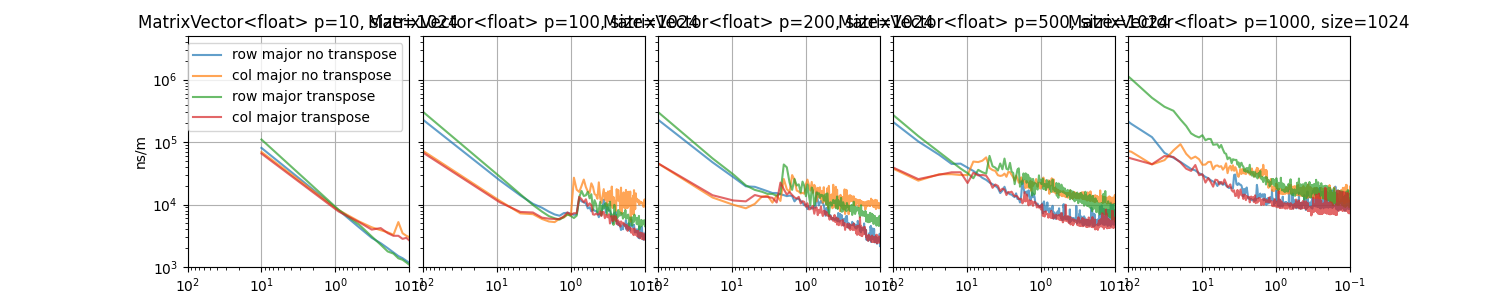

In [6]:
blas_benchfile = Path(os.path.abspath(''))/ "build/blas_benchmark.json"

with open(blas_benchfile, "r") as f:
    data = json.load(f)
    
for b in data['benchmarks']:
    method = b['name'].split('/')[0]
    p=int(b['name'].split('/')[1])
    m=int(b['name'].split('/')[2])
    block_size=int(b['name'].split('/')[3])
    row_order=int(b['name'].split('/')[4])
    trans=int(b['name'].split('/')[5])
    b['method'] = method
    b['p'] = p
    b['p/m']= p/m
    b['block_size'] = block_size
    b['row_order']=row_order
    b['transpose']=trans
    b['norm_cpu_time']=b['cpu_time']/m
    

fig3 = plt.figure()
fig3.set_figheight(3)
fig3.set_figwidth(15)

ps=[10, 100, 200, 500, 1000]
methods=["MatrixVector<float>"]
block_sizes=[1024]
transposes=[111,112]
row_orders = [101,102]

axs3=[]

i=0
for p, method, block_size in itertools.product(ps,methods,block_sizes):
    if i==0:
        axs3.append(plt.subplot(1,5,i+1))
    else:
        axs3.append(plt.subplot(1,5,i+1,sharey=axs3[i-1]))
        plt.tick_params('y', labelleft=False)
    axs3[i].set_xscale("log")
    axs3[i].set_yscale("log")
    axs3[i].set_xlim(0.1,100)
    axs3[i].set_ylim(1000,5000000)
    axs3[i].invert_xaxis()
    axs3[i].grid()

    for transpose,row_order in itertools.product(transposes,row_orders):
        runtimes = pd.DataFrame(data["benchmarks"])
        runtimes_filter=runtimes[((runtimes["p"]==p)&(runtimes["method"]==method)&(runtimes["row_order"]==row_order)&(runtimes["transpose"]==transpose)&(runtimes["block_size"]==block_size))]

        x= runtimes_filter["p/m"]
        y= runtimes_filter["norm_cpu_time"]
        
        
        axs3[i].plot(x,y, label=map_order_to_string(row_order)+" "+map_trans_to_string(transpose), alpha=0.7)
        
        axs3[i].set_title(method+" p="+str(p)+", size="+str(block_size))
        axs3[i].set_xlabel("p/m")
        if i==0:
            axs3[i].set_ylabel("ns/m")
    if i==0:
        axs3[i].legend()
    i=i+1
    
    plt.subplots_adjust(wspace=0.06)

plt.show